In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Sample data structure (you'll replace with your actual measurements)
metrics = {
    'Platforms': ['Full-Model (GPU)', 'TFLite Model (GPU)', 'Full-Model (CPU)','TFLite Model (CPU)', 'ArduinoNanoBLE(Est.)'],
    'Inference Time (ms)': [7.5, 63.7, 25.7, 184.6, 511.48]
}


metrics2 = {
    'Platforms': ['GPU', 'TFLite Model', 'Arduino Nano BLE(Est.)'],
    'Memory Usage (MB)': [720, round(2970.2/1024, 2), round(148.5/1024, 2)],  # Example values
    'Power Consumption (W)': [150, 50, 0.003],  # Example values
    'Accuracy (%)': [99, 97, 89]  # Example values
}

df = pd.DataFrame(metrics)
DF2 = pd.DataFrame(metrics2)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10164\322648855.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Platforms', y='Inference Time (ms)', data=df, palette='viridis')
C:\Users\Admin\AppData\Local\Temp\ipykernel_10164\322648855.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  memory_plot = sns.barplot(x='Platforms', y='Memory Usage (MB)', data=DF2, palette='viridis')


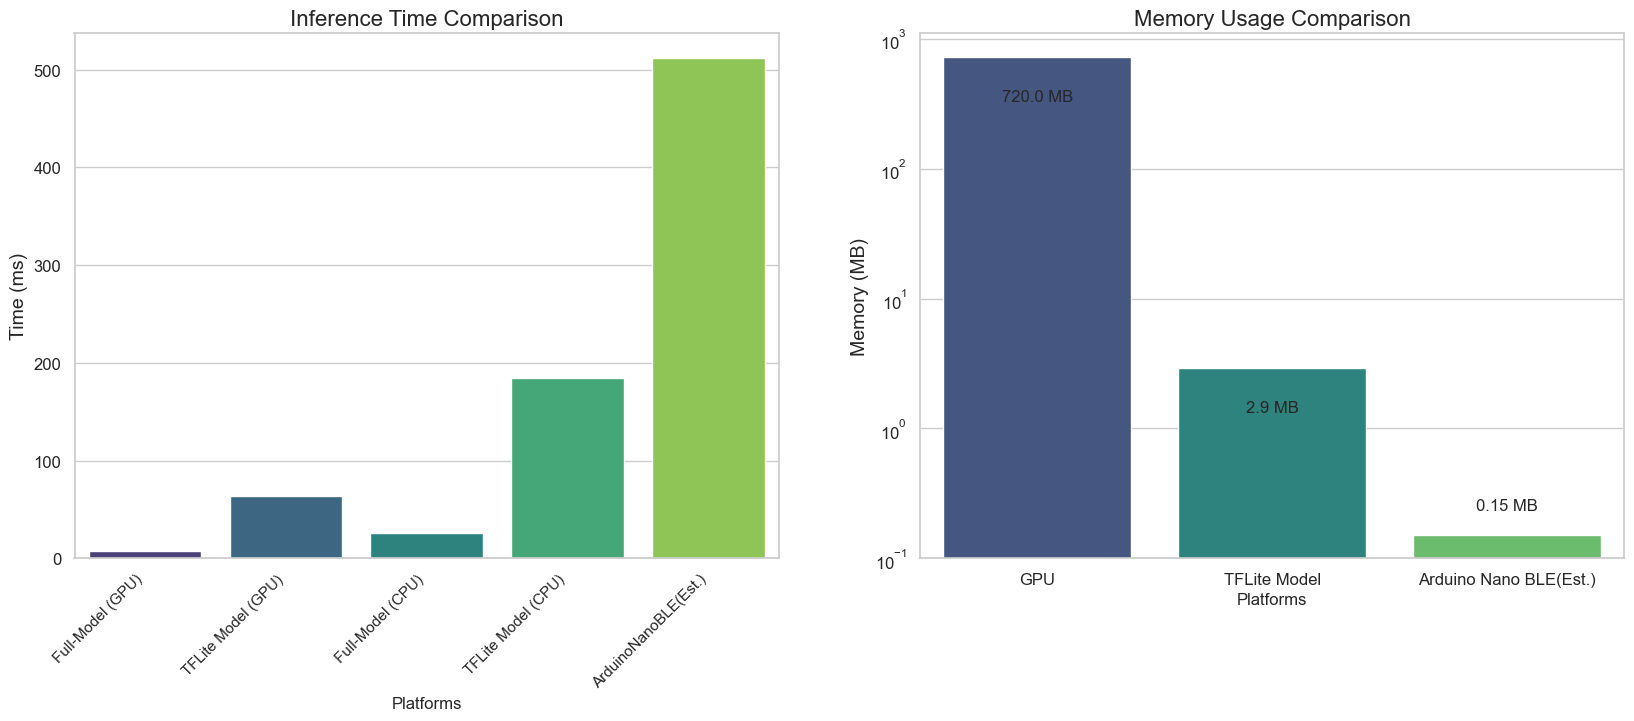

In [ ]:
# Set style for plots
sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))

# 1. Inference Time Comparison
plt.subplot(2, 2, 1)
sns.barplot(x='Platforms', y='Inference Time (ms)', data=df, palette='viridis')
plt.title('Inference Time Comparison', fontsize=16)
plt.ylabel('Time (ms)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(fontsize=12)

for i, v in enumerate(df['Inference Time (ms)']):
        plt.text(i, v + 1, f"{v:.1f} ms", ha='center')

# 2. Memory Usage Comparison (log scale)
plt.subplot(2, 2, 2)
memory_plot = sns.barplot(x='Platforms', y='Memory Usage (MB)', data=DF2, palette='viridis')
plt.title('Memory Usage Comparison', fontsize=16)
plt.ylabel('Memory (MB)', fontsize=14)
plt.yscale('log')  # Log scale for better comparison
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add value labels on bars
# for i, value in enumerate(df['Memory Usage (MB)']):
#     memory_plot.text(i, value/10, f'{value} MB', ha='center', fontsize=12)

# Add value labels on bars with adjusted position
for i, value in enumerate(DF2['Memory Usage (MB)']):
    if value < 1:  # For small values (like Arduino's 0.136)
        memory_plot.text(i, value * 1.5, f'{value:.2f} MB', 
                        ha='center', va='bottom', fontsize=12)
    else:  # For larger values
        memory_plot.text(i, value/2, f'{value} MB', 
                        ha='center', va='center', fontsize=12)

# Adjust y-axis limits to show small values better
plt.ylim(0.1, plt.ylim()[1])  # Set minimum y to 0.1 MB

plt.show()